
Results for variable: MACQ_CC_EFR01.aal
Threshold: 50.00
Reliability: 87.1%
Resilience: 0.4%


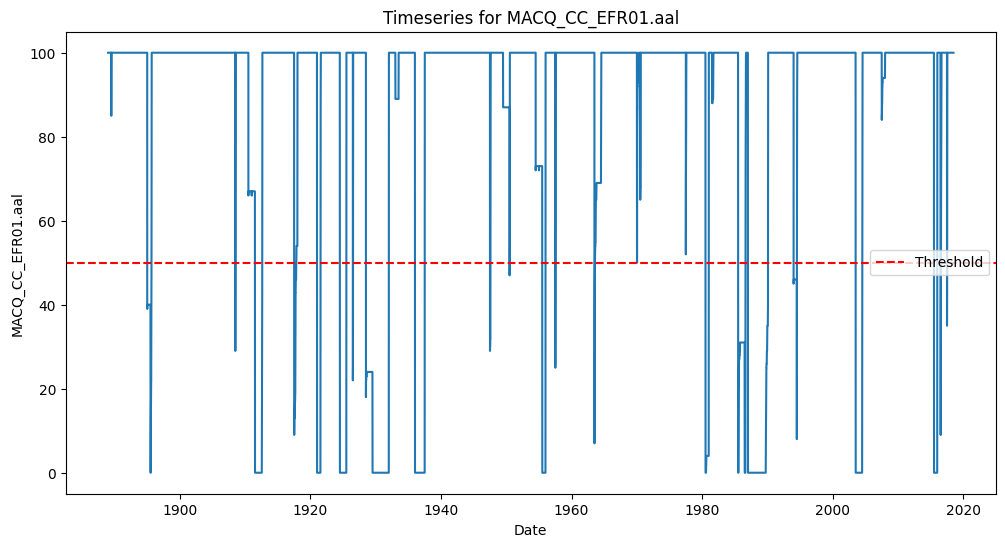

In [45]:
from werp_package.data_reader import NetCDFReader
from werp_package.metrics import ResilienceMetrics
import werp_package
import matplotlib.pyplot as plt

def run_demo(file_path, variable_name, threshold):
    """
    Run demonstration analysis on a specific variable.
    
    Parameters
    ----------
    file_path : str
        Path to the NetCDF file
    variable_name : str
        Name of the variable to analyze
    threshold : float
        Threshold value for resilience calculations
    """
    # Initialize the reader
    reader = NetCDFReader(file_path)
    
    # Get timeseries
    timeseries = reader.get_timeseries(variable_name)
    
    # Calculate metrics
    metrics = ResilienceMetrics(timeseries.values, threshold)
    reliability = metrics.calculate_reliability()
    resilience = metrics.calculate_resilience()
    
    # Get variable statistics
    #stats = reader.get_variable_statistics(variable_name)
    
    # Print results
    print(f"\nResults for variable: {variable_name}")
    print(f"Threshold: {threshold:.2f}")
    print(f"Reliability: {reliability:.1f}%")
    print(f"Resilience: {resilience:.1f}%")
    #print("\nVariable Statistics:")
    #for key, value in stats.items():
    #    print(f"{key}: {value:.2f}")
    
    # Optional: Plot the timeseries
    plt.figure(figsize=(12, 6))
    timeseries.plot()
    plt.axhline(y=threshold, color='r', linestyle='--', label='Threshold')
    plt.title(f'Timeseries for {variable_name}')
    plt.legend()
    plt.show()

if __name__ == '__main__':
    # Example usage
    bp = Path(werp_package.__file__).parent.parent
    file_path = bp/'data/sample_data.nc'
    variable_name = 'MACQ_CC_EFR01.aal'  # Example variable
    threshold = 50  # Set appropriate threshold
    
    run_demo(file_path, variable_name, threshold) 